<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
#install library
!pip install google-search-results
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
#import library needed for the search
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns

plt.style.use('fivethirtyeight')

In [94]:
#SerpApi google search
search_term="Data Analyst" #Job to be searching
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [95]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

https://serpapi.com/search


<ipython-input-95-d668609e91a2>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [96]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,salary,work_from_home
0,Data Analyst,Corbion,"Lenexa, KS",via Careers In Food,"At Corbion, we exist to champion preservation ...","[{'title': 'Qualifications', 'items': ['Bachel...","[{'link': 'http://www.corbion.com/', 'text': '...",https://encrypted-tbn0.gstatic.com/images?q=tb...,"[21 hours ago, Full-time]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,21 hours ago,Full-time,NaN,NaN


In [97]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    1
related_links     0
thumbnail         4
extensions        0
job_id            0
posted_at         0
schedule_type     0
salary            9
work_from_home    6
dtype: int64

In [98]:
jobs_df.shape #Shape of the DataFrame

(10, 14)

In [99]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  9 non-null      object
 6   related_links   10 non-null     object
 7   thumbnail       6 non-null      object
 8   extensions      10 non-null     object
 9   job_id          10 non-null     object
 10  posted_at       10 non-null     object
 11  schedule_type   10 non-null     object
 12  salary          1 non-null      object
 13  work_from_home  4 non-null      object
dtypes: object(14)
memory usage: 1.2+ KB


# HARD SKILLS 


In [120]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [121]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [122]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [123]:
Ujobs

,items
0,[Bachelor's degree (or equivalent) in business...
1,[Bachelor’s degree or higher in computer scien...
2,[3+ years’ previous analytics experience devel...
3,"[C++, Java, .NET, Java script, Rest API/ RestF..."
4,[Masters/Bachelor’s degree in Information tech...
6,"[Bachelor’s degree in business, economics, sta..."
7,[BA/BS Degree 3+ year’s relevant experience or...
8,[Candidates must be experienced in providing a...
9,[Two years of professional experience in analy...


In [124]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

In [125]:
pd.pivot_table(toolsJob,index = toolsJob)

""
0
"2+ years of experience working with large databases, data verification, and data management, or 1+ years IT experience"
3+ years of experience in an analytical position
3+ years’ experience with Microsoft Power BI or similar products
3+ years’ experience with T-SQL
"3+ years’ previous analytics experience developing business solutions using comprehensive, robust data assets"
...
Working knowledge of SQL/query languages
"Working knowledge of SQL/querying languages, should be able to write complex queries"
"Working knowledge of at least one programming language for data analysis, such as R, Python (including NumPy, pandas, and scikit-learn), or Julia"


In [126]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:   
  if "R" in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "Power BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

In [127]:
tools

['SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'Python',
 'Python',
 'Python',
 'Python',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'Excel',
 'Excel',
 'Excel',
 'Tableau',
 'Power BI']

# AVERAGE TIME

In [108]:
time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   



# **SUMMARY**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

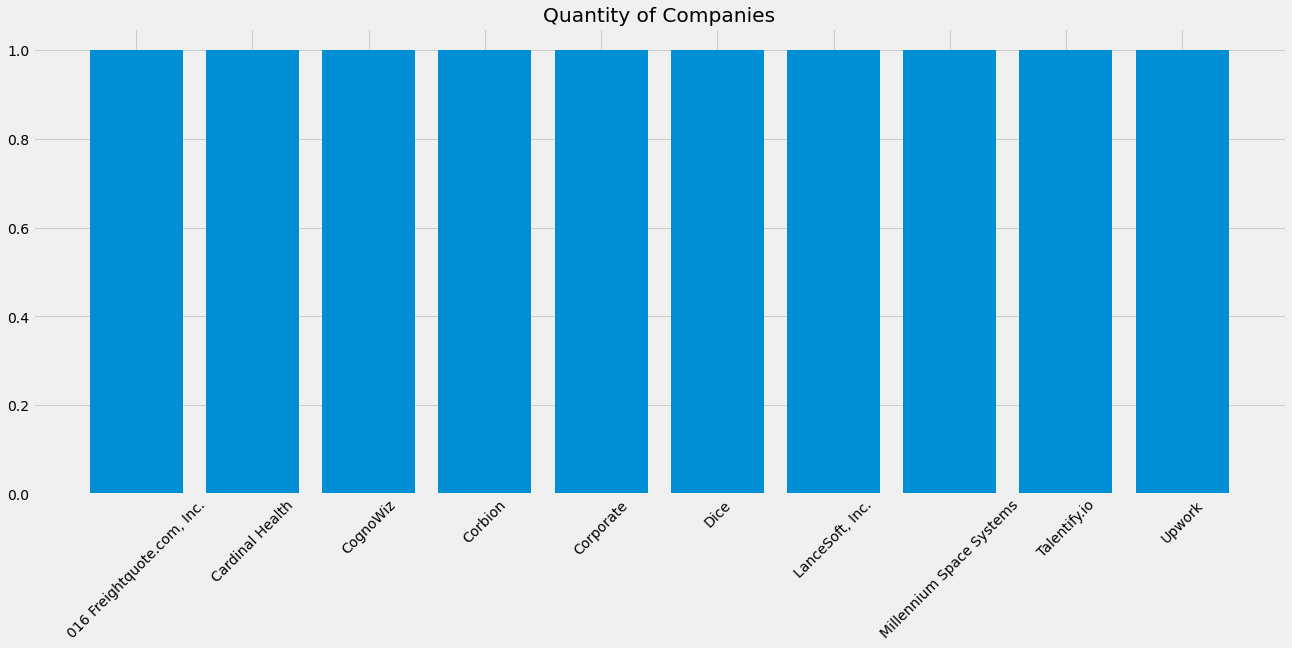

In [137]:
name = jobs_df.groupby(['company_name'])['company_name'].count()
name
plt.figure(figsize=(20,8))
plt.bar(x=name.index, height=name.values)
plt.title("Quantity of Companies")
plt.xticks(rotation=45)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

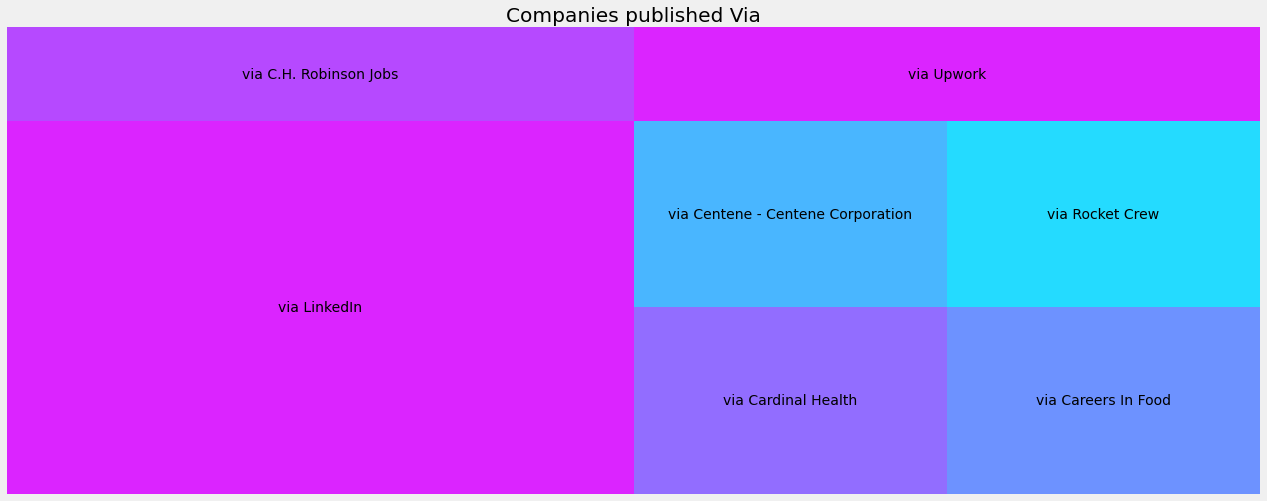

In [151]:
via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(20,8))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("cool_r"))
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)

In [141]:
px.bar(tools)

In [142]:
px.bar(time)